In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 


In [31]:
# loading data
data = pd.read_csv('Online_Retail.csv')
print(data.info())

# counting nulls of each column
nulls_count = data.isnull().sum()
print(nulls_count)

# removing rows with nulls
data.dropna(inplace=True)

# check for nulls again
nulls_count = data.isnull().sum()
print(nulls_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [32]:
# checking if there are duplicates
duplicates = data[data.duplicated(keep=False)]

print("Duplicate rows:")
print(duplicates.head(2))

# removes duplicate rows
data.drop_duplicates(inplace=True) 

print(data.shape)


Duplicate rows:
    InvoiceNo StockCode                    Description  Quantity  \
485    536409     22111   SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866  HAND WARMER SCOTTY DOG DESIGN         1   

         InvoiceDate  UnitPrice  CustomerID         Country  
485  12/1/2010 11:45       4.95     17908.0  United Kingdom  
489  12/1/2010 11:45       2.10     17908.0  United Kingdom  
(401604, 8)


In [33]:
# data format conversion
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [34]:
# creating new features

# calculate total spending per customer
total_spending = data.groupby('CustomerID')[['Quantity', 'UnitPrice']].apply(
    lambda x: (x['Quantity'] * x['UnitPrice']).sum()).reset_index()
total_spending.columns = ['CustomerID', 'TotalSpending']

# calculate purchase frequency per customer
purchase_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchase_frequency.columns = ['CustomerID', 'PurchaseFrequency']

# calculate average order value per customer
aov = data.groupby('CustomerID').apply(
    lambda x: (x['Quantity'] * x['UnitPrice']).sum() / x['InvoiceNo'].nunique()).reset_index()
aov.columns = ['CustomerID', 'AverageOrderValue']

# calculate time since last purchase per customer
max_date = data['InvoiceDate'].max()
data['TimeSinceLastPurchase'] = max_date - data['InvoiceDate']
recency = data.groupby('CustomerID')['TimeSinceLastPurchase'].min().reset_index()
recency.columns = ['CustomerID', 'TimeSinceLastPurchase']

# merge the new features into a single DataFrame and set 'CustomerID' as the index
customer_data = data[['CustomerID']]
customer_data.set_index('CustomerID', inplace=True)  

# merge the new features into the DataFrame
customer_data = customer_data.join(total_spending.set_index('CustomerID'))
customer_data = customer_data.join(purchase_frequency.set_index('CustomerID'))
customer_data = customer_data.join(aov.set_index('CustomerID'))
customer_data = customer_data.join(recency.set_index('CustomerID'))

print(customer_data.head(5))
print(customer_data.shape)

# making TimeSinceLastPurchase have days only
customer_data['TimeSinceLastPurchase'] = customer_data['TimeSinceLastPurchase'].dt.days

print(customer_data.head(5))
data_types = customer_data.dtypes
print(data_types)

            TotalSpending  PurchaseFrequency  AverageOrderValue  \
CustomerID                                                        
12346.0               0.0                  2           0.000000   
12346.0               0.0                  2           0.000000   
12347.0            4310.0                  7         615.714286   
12347.0            4310.0                  7         615.714286   
12347.0            4310.0                  7         615.714286   

           TimeSinceLastPurchase  
CustomerID                        
12346.0        325 days 02:33:00  
12346.0        325 days 02:33:00  
12347.0          1 days 20:58:00  
12347.0          1 days 20:58:00  
12347.0          1 days 20:58:00  
(401604, 4)
            TotalSpending  PurchaseFrequency  AverageOrderValue  \
CustomerID                                                        
12346.0               0.0                  2           0.000000   
12346.0               0.0                  2           0.000000   
12347

In [35]:
# feature scaling using Min Max scaling method
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_data)
customer_data = pd.DataFrame(scaled_data, columns=customer_data.columns)
print(customer_data.head(5))


   TotalSpending  PurchaseFrequency  AverageOrderValue  TimeSinceLastPurchase
0       0.015109           0.004049           0.408529               0.871314
1       0.015109           0.004049           0.408529               0.871314
2       0.030297           0.024291           0.467194               0.002681
3       0.030297           0.024291           0.467194               0.002681
4       0.030297           0.024291           0.467194               0.002681


C:\Users\hassn\anaconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hassn\anaconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hassn\anaconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hassn\anaconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

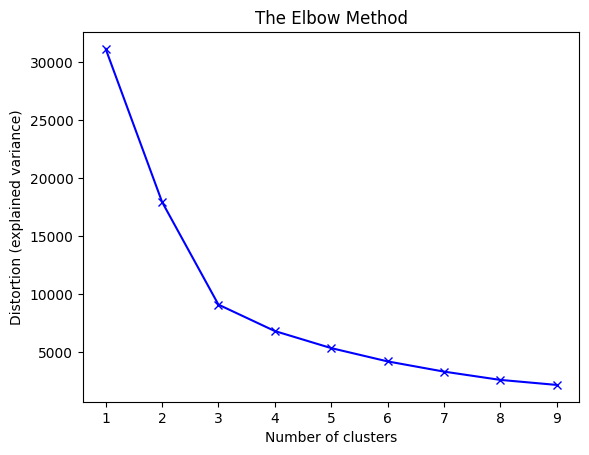

In [36]:
# finding the optimal no. of clusters through elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(customer_data)
    distortions.append(kmeansModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (explained variance)')
plt.title('The Elbow Method')
plt.show()


In [37]:
# after detecting elbow point on the graph is equal to 3
# initializing K-means with 3 and fitting the model to customer_data
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=32)

kmeans.fit(customer_data)

# adding cluster labels to data
customer_data['Cluster'] = kmeans.labels_

print(customer_data.head(5))

   TotalSpending  PurchaseFrequency  AverageOrderValue  TimeSinceLastPurchase  \
0       0.015109           0.004049           0.408529               0.871314   
1       0.015109           0.004049           0.408529               0.871314   
2       0.030297           0.024291           0.467194               0.002681   
3       0.030297           0.024291           0.467194               0.002681   
4       0.030297           0.024291           0.467194               0.002681   

   Cluster  
0        2  
1        2  
2        1  
3        1  
4        1  


In [38]:
print(customer_data['Cluster'].value_counts(ascending=True))

Cluster
0     29542
2     37704
1    334358
Name: count, dtype: int64


In [39]:
cluster_mean = customer_data.groupby('Cluster')[
    ['TotalSpending', 'PurchaseFrequency', 'AverageOrderValue', 'TimeSinceLastPurchase']].mean().reset_index()
print(cluster_mean)
cluster_mean['TotalSpending'] = cluster_mean['TotalSpending'].astype(float)
cluster_mean['PurchaseFrequency'] = cluster_mean['PurchaseFrequency'].astype(float)
cluster_mean['AverageOrderValue'] = cluster_mean['AverageOrderValue'].astype(float)
cluster_mean['TimeSinceLastPurchase'] = cluster_mean['TimeSinceLastPurchase'].astype(float)


   Cluster  TotalSpending  PurchaseFrequency  AverageOrderValue  \
0        0       0.304268           0.673774           0.476042   
1        1       0.036201           0.047580           0.448112   
2        2       0.018647           0.009255           0.443408   

   TimeSinceLastPurchase  
0               0.002613  
1               0.060784  
2               0.570562  


C:\Users\hassn\AppData\Local\Temp\ipykernel_10932\646763735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_mean, x='Cluster', y='TotalSpending', ax=axes[0], palette='rainbow')
C:\Users\hassn\AppData\Local\Temp\ipykernel_10932\646763735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_mean, x='Cluster', y='PurchaseFrequency', ax=axes[1], palette='rainbow')
C:\Users\hassn\AppData\Local\Temp\ipykernel_10932\646763735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_mean, x='Cluster', y='AverageO

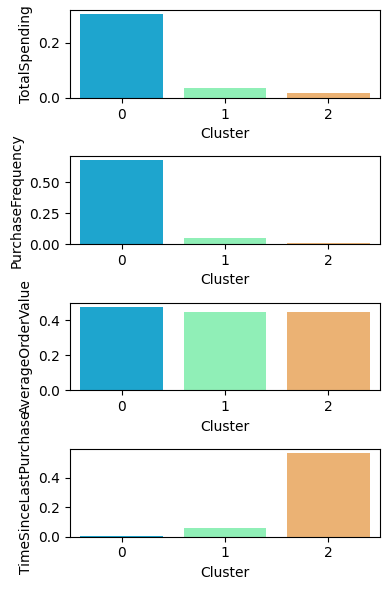

In [40]:

fig, axes = plt.subplots(nrows=4, figsize=(4, 6))

# Plot barplots for each variable with rainbow palette
sns.barplot(data=cluster_mean, x='Cluster', y='TotalSpending', ax=axes[0], palette='rainbow')
sns.barplot(data=cluster_mean, x='Cluster', y='PurchaseFrequency', ax=axes[1], palette='rainbow')
sns.barplot(data=cluster_mean, x='Cluster', y='AverageOrderValue', ax=axes[2], palette='rainbow')
sns.barplot(data=cluster_mean, x='Cluster', y='TimeSinceLastPurchase', ax=axes[3], palette='rainbow')

plt.tight_layout()
plt.show()